# Projet : Classification du Titanic (Régression logistique)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Pour le jeu de données Titanic et la visualisation

# Outils de Scikit-learn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression # Modèle de classification 
from sklearn import metrics

### Préparation des données

In [12]:
# Chargement du jeu de données Titanic
data = sns.load_dataset('titanic')

# Définition des features (X) et de la cible (Y)
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']
target = 'survived' # 0 = Décédé, 1 = Survivant

# Créer un sous-DataFrame de travail
df = data[features + [target]].copy()

print("\n--- Aperçu du DataFrame de travail ---")
print(df.head())
print("\nStatut des valeurs manquantes avant nettoyage :")
print(df.isnull().sum())


--- Aperçu du DataFrame de travail ---
   pclass     sex   age  sibsp  parch     fare  survived
0       3    male  22.0      1      0   7.2500         0
1       1  female  38.0      1      0  71.2833         1
2       3  female  26.0      0      0   7.9250         1
3       1  female  35.0      1      0  53.1000         1
4       3    male  35.0      0      0   8.0500         0

Statut des valeurs manquantes avant nettoyage :
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
survived      0
dtype: int64


Les variables explicatives utilisées incluent la classe du billet, le sexe, l’âge, la composition familiale à bord et le prix du billet.

La colonne 'age' contient des valeurs manquantes (NaN) que nous devons gérer.
La solution la plus simple est de remplacer les NaN par l'âge médian pour ne pas biaiser le modèle.

In [13]:
median_age = df['age'].median()
df['age'] = df['age'].fillna(median_age)
print(f"\nValeurs manquantes dans 'age' remplacées par la médiane ({median_age:.2f} ans).")

# Supprimer les quelques lignes qui pourraient encore contenir des NaN
df = df.dropna()


Valeurs manquantes dans 'age' remplacées par la médiane (28.00 ans).


In [14]:
### Encodage des variables catégorielles (car la LogisticRegression ne peut travailler qu'avec des nombres)

df["sex"] = df["sex"].map({'male': 0, 'female': 1})
print("\n--- Aperçu du DataFrame après nettoyage et encodage ---")
print(df.head())

# Séparation des features et de la cible
X = df[features]
Y = df[target]

# Division en ensembles d'entraînement et de test (80% entraînement, 20% test)
x_train, x_test,y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y) # Stratify pour maintenir la proportion de classes





--- Aperçu du DataFrame après nettoyage et encodage ---
   pclass  sex   age  sibsp  parch     fare  survived
0       3    0  22.0      1      0   7.2500         0
1       1    1  38.0      1      0  71.2833         1
2       3    1  26.0      0      0   7.9250         1
3       1    1  35.0      1      0  53.1000         1
4       3    0  35.0      0      0   8.0500         0


## Entraînement et Prédiction (Régression Logistique)

In [17]:
logistic_model = LogisticRegression(solver='liblinear', random_state=42, max_iter=300) # 'liblinear' est adapté pour les petits jeux de données
logistic_model.fit(x_train, y_train) # Entraînement du modèle
y_pred = logistic_model.predict(x_test) # Prédictions sur l'ensemble de test


## Evaluation de la classification

### Matrice de confusion

In [18]:
cm = metrics.confusion_matrix(y_test, y_pred) # Matrice de confusion

print("--- RAPPORT DE CLASSIFICATION ---")
# Le rapport donne Precision, Recall et F1-Score pour chaque classe (0 et 1)
print(metrics.classification_report(y_test, y_pred))

# Accuracy (Précision globale)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"\nAccuracy Globale du Modèle : {accuracy:.4f}")

--- RAPPORT DE CLASSIFICATION ---
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


Accuracy Globale du Modèle : 0.8045


### Visualisation 

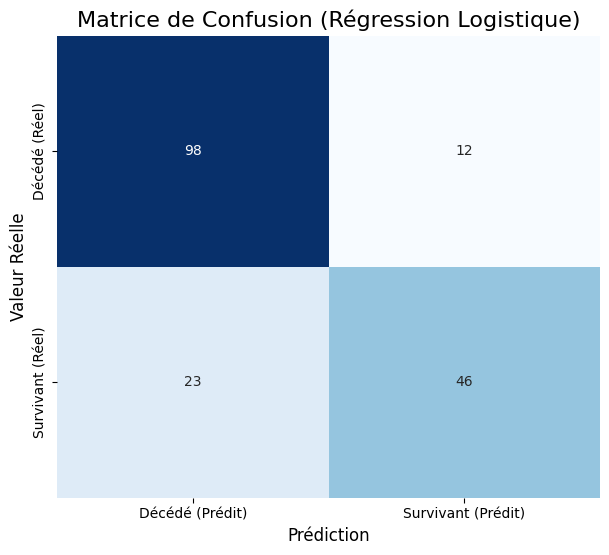

In [19]:
plt.figure(figsize=(7, 6))
sns.heatmap(
    cm, 
    annot=True, # Afficher les nombres dans les cases
    fmt="d",    # Format numérique (entier)
    cmap="Blues", 
    cbar=False,
    xticklabels=['Décédé (Prédit)', 'Survivant (Prédit)'],
    yticklabels=['Décédé (Réel)', 'Survivant (Réel)']
)
plt.title('Matrice de Confusion (Régression Logistique)', fontsize=16)
plt.ylabel('Valeur Réelle', fontsize=12)
plt.xlabel('Prédiction', fontsize=12)
plt.show()

## Conclusion

Le modèle de classification présente une accuracy globale d’environ 80 %, indiquant de bonnes performances générales. Toutefois, l’analyse détaillée du rapport de classification révèle une asymétrie entre les classes. Le modèle est particulièrement performant pour la classe 0, avec un rappel élevé de 0.89, tandis que la classe 1 est moins bien détectée, avec un rappel de 0.67. Cela suggère la présence de faux négatifs et indique que le modèle privilégie la classe majoritaire. Une amélioration pourrait être envisagée afin d’augmenter la sensibilité à la classe 1.